<b><p style=' center;'> LINMA2472 - Algorithms in Data Science  </p> </b>

<b><p style='text-align: center;'> Network Analysis on Harry Potter and theSorcerer’s Stone, a novel by J. K. Rowling </p> </b>

<p style='text-align: Center;'>
    Sarra Laksaci, Mojgan Giahi, Sixto Castro Redroban</p>


## Importing Necessary Packages

In [ ]:
import networkx as nx
import community
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
from math import ceil, floor
import matplotlib.colors as colors
import numpy as np 
import time
import random
import sklearn.metrics as mt
import re
from nameparser.parser import HumanName

## Preprocessing Phase: Information gathering and Network Creation

In [ ]:
def float_round(num, places = 0, direction = floor):
    return direction(num * (10**places)) / float(10**places)

In [ ]:
def name_correct(text):
    text=text.split()
    text=[i.lower().capitalize() for i in text]
    name=' '.join(i for i in text)
    return name

In [ ]:
def get_name(name):
    extractedRelation={}
    TITLE = r"(?:[A-Z][a-z]*\.\s*)?"
    NAME1 = r"[A-Z][a-z]+,?\s+"
    MIDDLE_I = r"(?:[A-Z][a-z]*\.?\s*)?"
    NAME2 = r"[A-Z][a-z]+"
    Fullname = HumanName(name)
    if Fullname['middle']!='':
        returnName=[Fullname['first'],Fullname['middle'],Fullname['last']]
    else:
        returnName=[Fullname['first'],Fullname['last']]
    return returnName

In [ ]:
f=open('D:\\RoleCharacters.txt')
file=f.readlines()
allnames={}
for name_Uncorrect in file[1:]:
    Name_role=name_Uncorrect.split(',')
    print(Name_role)
    role=Name_role[1]
    name=Name_role[0].split('/') 
    name_corrected=name_correct(name[0])
    DetailName=get_name(name_corrected)
    if len(name)>1:
        Alias=name_correct(name[1])
        if Alias not in allnames:
            allnames[Alias]=[(name_corrected,role[:-2].strip())]
        
    for i in DetailName:
        if i!='':
            if i not in allnames:
                allnames[i]=[(name_corrected,role[:-2].strip())]
            else:
                allnames[i].append((name_corrected,role[:-2].strip()))


['HARRY POTTER /MR. POTTER /THE BOY WHO LIVED /HARRY /POTTER', ' the boy who lived main character of the series.\n']
['RON WEASLEY /RON', " harry's best friend marries hermione.\n"]
['RUBEUS HAGRID /RUBEUS /HAGRID', ' half-giant who loves harry he was the keeper of keys and grounds at hogwards.\n']
['HERMIONE GRANGER /HERMIONE /GRANGER', " one of harry's best friend and marries ron weasley.\n"]
['DRACO MALFOY /DRACO /MALFOY', ' slytherin student who had many arguments with harry.\n']
['ADALBERT WAFFLING /ADALBERT /WAFFLING', ' author of magical theory.\n']
['ADRIAN PUCEY', ' a chaser on the slytherin quidditch team.\n']
['ALBUS DUMBLEDORE /DUMBELDORE /ALBUS', ' headmaster of hogwards killed by snape.\n']
['ALGIE LONGBOTTOM /ALGIE', " nevill's great uncle.\n"]
['ALICIA SPINNET', ' a gryffindor girl two years older than harry.\n']
['ANGELINA JOHNSON', ' a gryffindor house chaser.\n']
['ARGUS FILCH /ARGUS /FILCH', ' squib caretake of hogwards.\n']
['ARSENIUS JIGGER /PHYLLIDA /SPORE', ' au

In [ ]:
def find_most_relevant(word, index, result, allnames):
    findleft=False
    findright=False
    for i in allnames[word]:
        nameCandit=i[0]
        if index>0:
            if nameCandit.find(result[index-1])>=0:
                findleft=True
                
        if index<len(result)-1:
            if nameCandit.find(result[index+1])>=0:
                findright=True
        if findleft or findright:
            
            return nameCandit
            break
    if findleft==False or findright==False:
        for i in allnames[word]:
            nameCandit=i[0]
            desc=i[1]
            if index>0:
                if desc.find(result[index-1])>=0 or desc.find(result[index-1].lower())>=0:
                    findleft=True
            if index<len(result)-1:        
                if desc.find(result[index+1])>=0 or desc.find(result[index+1].lower())>=0:
                    findright=True
            if findleft or findright:
                return nameCandit
                break
    if findleft==False or findright==False:
        return False

allnames is a dictionary that stores all possible names in the book. Its keys are  names, nicknames, or family names, and its values are lists of all possible full names observed in the book which contains the key as name, nickname, or familiy name.

In [ ]:
allnames

{'Mr. Potter': [('Harry Potter',
   'the boy who lived main character of the series')],
 'Harry': [('Harry Potter', 'the boy who lived main character of the series')],
 'Potter': [('Harry Potter', 'the boy who lived main character of the series'),
  ('James Potter', 'father of harry murdered by voldemort'),
  ('Lily Potter', 'mother of harry murdered by voldemort')],
 'Ron': [('Ron Weasley', "harry's best friend marries hermione"),
  ('Ron Weasley', "harry's best friend marries hermione")],
 'Weasley': [('Ron Weasley', "harry's best friend marries hermione"),
  ('Charlie Weasley',
   'second son of arthur and molly works with dragons in romania'),
  ('Fred Weasley',
   "identical twin with george and co-owner of weasleys' wizard wheezes"),
  ('George Weasley',
   "identical twin with fred and co-owner of weasleys' wizard wheezes"),
  ('Ginny Weasley',
   'marries harry potter and only daughter of molly and arthur'),
  ('Molly Weasley',
   'wife of arthur and mother of the weasleys kill

In [ ]:
#Loading the Book
with open("D:\\HarryPotter.txt", "r") as input:
    file_separated = input.read().split("\n\n")  

In [ ]:
len(file_separated)

3032

In [ ]:
Paranames={}
counter=0
paraHarry=[]
praraWord=0
paranameCounter=0
for para in file_separated:
    NAME = r"[A-Z][a-z]+"
    result=re.findall( NAME, para)
    parawords=[]
    for i in range(len(result)):
        word=result[i]
        if word in allnames:
            if len(allnames[word])==1:
                print(allnames[word])
                parawords.append(allnames[word][0][0])
            else:
                NameInterpreted=find_most_relevant(word,i , result, allnames)
                if NameInterpreted:
                    parawords.append(NameInterpreted)
                else: 
                    if word=='Harry': # Harry Potter is the main character and is mentioned frequently 
                        parawords.append(allnames[word][0][0])
                    else:
                        parawords.append(allnames[word][0][0])
    
    #print(parawords)
    parawords=list(set(parawords))
    if parawords!=[] and len(parawords)>1:
        praraWord+=len(para.split())
        Paranames[counter]=parawords
        paranameCounter+=len(parawords)
        if 'Harry'in parawords:
            paraHarry.append(counter)
    counter+=1
                    
                

[('Harry Potter', 'the boy who lived main character of the series')]
[('Harry Potter', 'the boy who lived main character of the series')]
[('Harry Potter', 'the boy who lived main character of the series')]
[('Harry Potter', 'the boy who lived main character of the series')]
[('Jim Mcguffin', 'jim mcguffin was the weatherman on the evening news vernon dursley was watching on november 1 1981')]
[('Jim Mcguffin', 'jim mcguffin was the weatherman on the evening news vernon dursley was watching on november 1 1981')]
[('Petunia Dursley', "harry's aunt and sister of lily")]
[('Harry Potter', 'the boy who lived main character of the series')]
[('Petunia Dursley', "harry's aunt and sister of lily")]
[('Petunia Dursley', "harry's aunt and sister of lily")]
[('Albus Dumbledore', 'headmaster of hogwards killed by snape')]
[('Albus Dumbledore', 'headmaster of hogwards killed by snape')]
[('Albus Dumbledore', 'headmaster of hogwards killed by snape')]
[('Albus Dumbledore', 'headmaster of hogwards k

In [ ]:
Paranames

{5: ['Harry Potter', 'Dudley Dursley'],
 15: ['Harry Potter', 'Dudley Dursley'],
 26: ['Petunia Dursley', 'Dudley Dursley'],
 32: ['Harry Potter', 'Dudley Dursley'],
 39: ['Petunia Dursley', 'Dudley Dursley'],
 45: ['Albus Dumbledore', 'Dudley Dursley'],
 68: ['Lily Potter', 'James Potter'],
 70: ['Lily Potter', 'Albus Dumbledore', 'James Potter'],
 76: ['Albus Dumbledore', 'Rubeus Hagrid'],
 79: ['Harry Potter', 'Albus Dumbledore'],
 81: ['Harry Potter', 'Albus Dumbledore'],
 83: ['Harry Potter', 'Albus Dumbledore'],
 86: ['Rubeus Hagrid', 'Albus Dumbledore'],
 90: ['Rubeus Hagrid', 'Albus Dumbledore'],
 91: ['Albus Dumbledore', 'Sirius Black'],
 99: ['Harry Potter', 'Albus Dumbledore'],
 100: ['Harry Potter', 'Rubeus Hagrid'],
 102: ['Harry Potter', 'Lily Potter', 'Rubeus Hagrid', 'James Potter'],
 103: ['Harry Potter', 'Rubeus Hagrid', 'Albus Dumbledore'],
 105: ['Rubeus Hagrid', 'Sirius Black', 'Albus Dumbledore'],
 110: ['Harry Potter', 'Dudley Dursley'],
 114: ['Harry Potter', 'P

In [ ]:
print('Count of paragraphs: ' + str(counter))
print('Count of paragraphs in which at least two charachters are mentioned: ' + str(len(Paranames)))
print('The average count of words in the paragraphs: ' + str(float_round(praraWord/len(Paranames),2)))
print('The average count of Names in the paragraphs: ' + str(float_round(paranameCounter/len(Paranames),2)))

Count of paragraphs: 3032
Count of paragraphs in which at least two charachters are mentioned: 866
The average count of words in the paragraphs: 41.0
The average count of Names in the paragraphs: 2.52


In [ ]:
f=open('D:\\NameListInParagraph.txt','w+')
for i in Paranames:
    text=','.join(Paranames[i])
    text=text+'\n'
    f.write(text)
f.close()

In [ ]:
adjL={}
namelist=[]
for i in Paranames:
    namelist+=Paranames[i]               

In [ ]:
len(set(namelist))

61

In [ ]:
namelist

['Harry Potter',
 'Dudley Dursley',
 'Harry Potter',
 'Dudley Dursley',
 'Petunia Dursley',
 'Dudley Dursley',
 'Harry Potter',
 'Dudley Dursley',
 'Petunia Dursley',
 'Dudley Dursley',
 'Albus Dumbledore',
 'Dudley Dursley',
 'Lily Potter',
 'James Potter',
 'Lily Potter',
 'Albus Dumbledore',
 'James Potter',
 'Albus Dumbledore',
 'Rubeus Hagrid',
 'Harry Potter',
 'Albus Dumbledore',
 'Harry Potter',
 'Albus Dumbledore',
 'Harry Potter',
 'Albus Dumbledore',
 'Rubeus Hagrid',
 'Albus Dumbledore',
 'Rubeus Hagrid',
 'Albus Dumbledore',
 'Albus Dumbledore',
 'Sirius Black',
 'Harry Potter',
 'Albus Dumbledore',
 'Harry Potter',
 'Rubeus Hagrid',
 'Harry Potter',
 'Lily Potter',
 'Rubeus Hagrid',
 'James Potter',
 'Harry Potter',
 'Rubeus Hagrid',
 'Albus Dumbledore',
 'Rubeus Hagrid',
 'Sirius Black',
 'Albus Dumbledore',
 'Harry Potter',
 'Dudley Dursley',
 'Harry Potter',
 'Petunia Dursley',
 'Harry Potter',
 'Dudley Dursley',
 'Harry Potter',
 'Dudley Dursley',
 'Harry Potter',
 'P

In [ ]:
f=open('D:\\CharactersGender.txt')
Name_sexList=f.readlines()
Sex={}
for name in Name_sexList:
    name=name.split(',') 
    if name_correct(name[0]) in namelist:
        if name[1][:-1].strip()=='F':
            Sex[name_correct(name[0])]=0
        else:
            Sex[name_correct(name[0])]=1

In [ ]:
f=open('D:\\NameListInParagraph.txt')
allNodes=f.readlines()
Nodes=[]
for line in allNodes:
    line=line[:-1]
    Names=line.split(',')
    for name in Names:
        print(name)
        Nodes.append(name)
Nodes=list(set(Nodes))

Harry Potter
Dudley Dursley
Harry Potter
Dudley Dursley
Petunia Dursley
Dudley Dursley
Harry Potter
Dudley Dursley
Petunia Dursley
Dudley Dursley
Albus Dumbledore
Dudley Dursley
Lily Potter
James Potter
Lily Potter
Albus Dumbledore
James Potter
Albus Dumbledore
Rubeus Hagrid
Harry Potter
Albus Dumbledore
Harry Potter
Albus Dumbledore
Harry Potter
Albus Dumbledore
Rubeus Hagrid
Albus Dumbledore
Rubeus Hagrid
Albus Dumbledore
Albus Dumbledore
Sirius Black
Harry Potter
Albus Dumbledore
Harry Potter
Rubeus Hagrid
Harry Potter
Lily Potter
Rubeus Hagrid
James Potter
Harry Potter
Rubeus Hagrid
Albus Dumbledore
Rubeus Hagrid
Sirius Black
Albus Dumbledore
Harry Potter
Dudley Dursley
Harry Potter
Petunia Dursley
Harry Potter
Dudley Dursley
Harry Potter
Dudley Dursley
Harry Potter
Petunia Dursley
Dudley Dursley
Harry Potter
Vernon Dursley
Harry Potter
Vernon Dursley
Harry Potter
Vernon Dursley
Petunia Dursley
Dudley Dursley
Harry Potter
Dudley Dursley
Harry Potter
Dudley Dursley
Vernon Dursley
Du

In [ ]:
G = nx.Graph()
G.add_nodes_from(Nodes)
for node in G:
    G.nodes[node]['Sex']=Sex[node]
f=open('D:\\NameListInParagraph.txt')
allNodes=f.readlines()
for line in allNodes:
    line=line[:-1]
    Names=line.split(',')
    for name in Names:
        copy_name=Names.copy()
        copy_name.pop(copy_name.index(name))
        for copy in copy_name:
            if copy not in G[name]:
                G.add_edge(name,copy)


In [ ]:
G.nodes['Professor Flitwick']

{'Sex': 1}

In [ ]:
len(G.nodes())

61

In [ ]:
## Writing the network G into a csv file. It is an edge list representation of the network.
f=open('D:\\edge_list_Harry_Potter.csv','w+')
for i in G: 
    n=list(G[i])
    for j in n:
        print(i+','+j)
        f.write(i+','+j+'\n')
f.close()

Fred Weasley,George Weasley
Fred Weasley,Ginny Weasley
Fred Weasley,Harry Potter
Fred Weasley,Ron Weasley
Fred Weasley,Percy Weasley
Fred Weasley,Charlie Weasley
Fred Weasley,Severus Snape
Fred Weasley,Rubeus Hagrid
Fred Weasley,Gregory Goyle
Fred Weasley,Vincent Crabbe
Fred Weasley,Draco Malfoy
Fred Weasley,Adrian Pucey
Fred Weasley,Alicia Spinnet
Fred Weasley,Angelina Johnson
Fred Weasley,Marcus Flint
Fred Weasley,Katie Bell
Fred Weasley,Albus Dumbledore
Fred Weasley,Professor Flitwick
Fred Weasley,Neville Longbottom
Fred Weasley,Lucius Malfoy
Fred Weasley,Madam Pomfrey
Fred Weasley,Professor Quirrell
Seamus Finnigan,Harry Potter
Seamus Finnigan,Sir Nicholas De Mimst-porpington
Seamus Finnigan,Professor Quirrell
Seamus Finnigan,Ron Weasley
Seamus Finnigan,Severus Snape
Seamus Finnigan,Neville Longbottom
Seamus Finnigan,Draco Malfoy
Seamus Finnigan,Charlie Weasley
Seamus Finnigan,Argus Filch
Seamus Finnigan,Mrs. Norris
Seamus Finnigan,Hermione Granger
Seamus Finnigan,Professor Flitwic

In [ ]:
# Write .gexf file for gephi.
nx.write_gexf(G, "D:\\Harry_Potter.gexf")

### Loading Network

In [ ]:
df=pd.read_csv('/content/adjacency_matrix.csv')
characters=df.columns.values.tolist()
characters=characters[1:]

In [ ]:
df = df.iloc[: , 1:]
df

In [ ]:
adj_matrix=df.to_numpy()
adj_matrix

In [ ]:
characters

In [ ]:
generate_relations_file=[]
cpt=0
for i in range(len(characters)):
  for j in range(len(characters)):
    if(adj_matrix[i,j]>0):
      cpt=cpt+1
      #generate_relations_file=generate_relations_file+f"\n {characters[i]},{characters[j]}"
      generate_relations_file.append([characters[i],characters[j]])

In [ ]:
df_convert=pd.DataFrame(generate_relations_file)
df_convert

In [ ]:
df_convert.to_csv('/content/NEWedge_list_Harry_Potter.csv')

In [ ]:
#OLD NETWORK FROM DF
#network_file = '/content/edge_list_Harry_Potter.csv'
#G=nx.read_edgelist(network_file, delimiter=',')

In [ ]:
#GRAPH FROM ADJACENCY MATRIX
network_file='/content/NEWedge_list_Harry_Potter.csv'
G=nx.from_pandas_edgelist(df_convert,source=0,target=1)

In [ ]:
network_file = 'D:\\edge_list_Harry_Potter.csv'
G=nx.read_edgelist(network_file, delimiter=',')

### Clustering Coefficient

In [ ]:
CL=nx.clustering(G)

In [ ]:
CLSorted=sorted(CL.items(), key=lambda item: item[1], reverse=True)
print ('Top 5 Characters With the Highest Clustering Coefficient:' )
print(' ')
highCluster=[]
for i in range(5):
    print(CLSorted[i][0]+': ' + ' Clustring Coefficient: '+ str(float_round(CLSorted[i][1],2))+ ' - Degree: '
    +str(len(G[CLSorted[i][0]])))
    highCluster.append(CLSorted[i][0])
print('********************************************************')
print('Average Clustering Coefficient: '+ str(float_round(nx.average_clustering(G),2)))

Top 5 Characters With the Highest Clustering Coefficient:
 
Alicia Spinnet:  Clustring Coefficient: 1.0 - Degree: 6
Blaise Zabini:  Clustring Coefficient: 1.0 - Degree: 3
Bloody Baron:  Clustring Coefficient: 1.0 - Degree: 3
Enid:  Clustring Coefficient: 1.0 - Degree: 2
Sally-anne Perks:  Clustring Coefficient: 1.0 - Degree: 3
********************************************************
Average Clustering Coefficient: 0.73


In [ ]:
G['Harry Potter']

AtlasView({'Fred Weasley': {}, 'Seamus Finnigan': {}, 'Percy Weasley': {}, 'Neville Longbottom': {}, 'Gregory Goyle': {}, 'Sally-anne Perks': {}, 'George Weasley': {}, 'Blaise Zabini': {}, 'Padma Patil': {}, 'Professor Quirrell': {}, 'Madam Malkin': {}, 'Nott': {}, 'Dudley Dursley': {}, 'Albus Dumbledore': {}, 'Rubeus Hagrid': {}, 'Lily Potter': {}, 'James Potter': {}, 'Petunia Dursley': {}, 'Vernon Dursley': {}, 'Susan Bones': {}, 'Gringotts Spokesgoblin': {}, 'Tom Marvolo Riddle': {}, 'Doris Crockford': {}, 'Dedalus Diggle': {}, 'Vindictus Vridian': {}, 'Ron Weasley': {}, 'Hermione Granger': {}, 'Vincent Crabbe': {}, 'Draco Malfoy': {}, 'Hannah Abbott': {}, 'Mandy Brocklehurst': {}, 'Millicent Bulstrode': {}, 'Lisa Turpin': {}, 'Sirius Black': {}, 'Severus Snape': {}, 'Argus Filch': {}, 'Professor Flitwick': {}, 'Charlie Weasley': {}, 'Madam Hooch': {}, 'Ginny Weasley': {}, 'Mrs. Norris': {}, 'Lucius Malfoy': {}, 'Parvati Patil': {}, 'Marcus Flint': {}, 'Angelina Johnson': {}, 'Terre

In [ ]:
len(G['Harry Potter'])

52

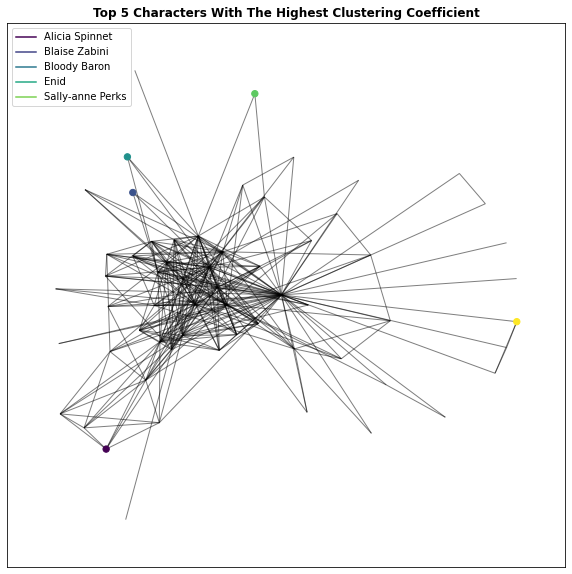

In [ ]:
HighCluster_Dict={}
Node_ID=0
for node in G:
    if node in highCluster:
        HighCluster_Dict[node]=Node_ID
        Node_ID+=1

vb = cm = plt.get_cmap('viridis')
cNorm  = colors.Normalize(vmin=0, vmax=max(HighCluster_Dict.values())+1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=vb)
f = plt.figure(figsize=(10, 10))
ax = f.add_subplot(1,1,1)
for label in HighCluster_Dict:
    ax.plot([0],[0],
            color=scalarMap.to_rgba(HighCluster_Dict[label]),
            label=label)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, HighCluster_Dict.keys(), node_size=40, 
                       node_color=list(HighCluster_Dict.values()),ax=ax)
nx.draw_networkx_edges(G, pos, alpha=0.5)
''''''
plt.axis('on')
f.set_facecolor("w")
plt.legend(loc='upper left')
plt.title('Top 5 Characters With The Highest Clustering Coefficient',fontweight ="bold")
plt.show()

### Degree Assortativity of the Network

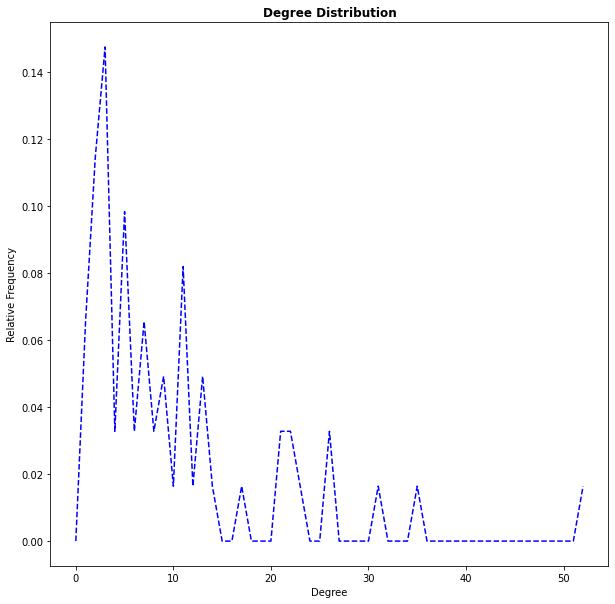

In [ ]:
degree_freq = nx.degree_histogram(G)

tempY=nx.degree_histogram(G)
tempX=list(range(len(tempY))) #isolated node's degree = 0
X=[];Y=[]

degrees = range(len(degree_freq))
plt.figure(figsize=(10, 10)) 
tot=sum(degree_freq[0:])
for i in range(1,len(tempY)):
        if tempY[i]!=0:
            Y.append(tempY[i])
            X.append(tempX[i])
degree_freq=[i/tot for i in degree_freq]

plt.plot(degrees[0:], degree_freq[0:],'b--') 
plt.xlabel('Degree')
plt.ylabel('Relative Frequency')
plt.title('Degree Distribution',fontweight ="bold")
plt.savefig('DegreeAssortativity.png')
plt.show()


In [ ]:
deg=dict(G.degree)
deg=sorted(deg.items(), key=lambda item: item[1], reverse=True)
print('Top 5 Characters With the Highest Degree:' )
print(' ')
highdegree=[]
for i in range(5):
    print(deg[i][0]+': ' + str(deg[i][1]))
    highdegree.append(deg[i][0])
print('********************************************************')
degrees = G.degree()
j=0
for i in G:
    j+=int(G.degree[i])
print('Average Degree: ' +str(float_round(j/len(G), 2) ))

Top 5 Characters With the Highest Degree:
 
Harry Potter: 52
Ron Weasley: 35
Rubeus Hagrid: 31
Draco Malfoy: 26
Hermione Granger: 26
********************************************************
Average Degree: 9.7


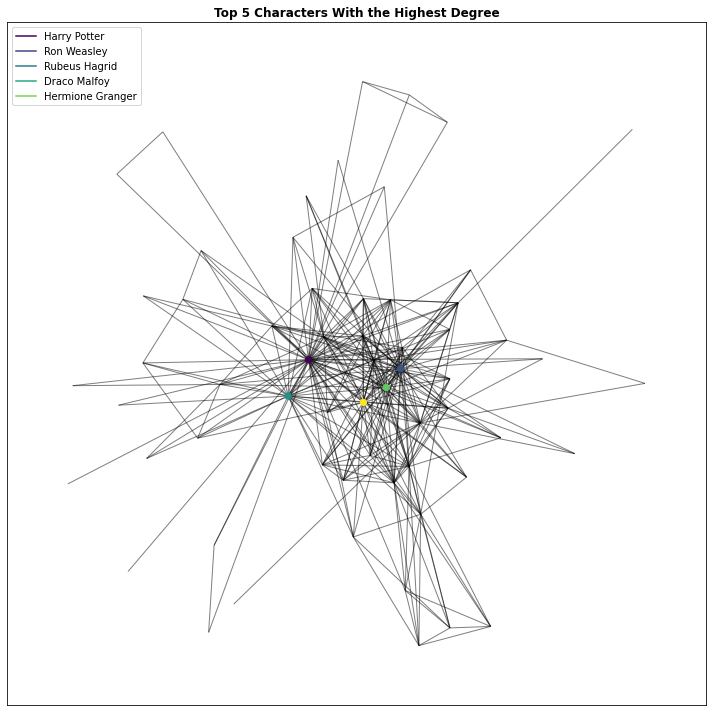

In [ ]:
High_Dict={}
Node_ID=0
for node in G:
    if node in highdegree:
        High_Dict[node]=Node_ID
        Node_ID+=1

vb = cm = plt.get_cmap('viridis')
cNorm  = colors.Normalize(vmin=0, vmax=max(High_Dict.values())+1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=vb)
f = plt.figure(figsize=(10, 10))
ax = f.add_subplot(1,1,1)
for label in High_Dict:
    ax.plot([0],[0],
            color=scalarMap.to_rgba(High_Dict[label]),
            label=label)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, High_Dict.keys(), node_size=40, 
                       node_color=list(High_Dict.values()),ax=ax)
nx.draw_networkx_edges(G, pos, alpha=0.5)
''''''
plt.axis('on')
f.set_facecolor('w')

plt.legend(loc='upper left')
plt.title('Top 5 Characters With the Highest Degree',fontweight ="bold")

f.tight_layout()

plt.show()

In [ ]:
print('Degree Assortativity Coefficient: '+ str( float_round(nx.degree_assortativity_coefficient(G),2)))

Degree Assortativity Coefficient: -0.35


The negative value indicates that the network is degree disassortative, meaning that high-degree nodes in the network associate preferentially with low-degree nodes. 

### Connectivity

In [ ]:
print( 'Number of Connected Components to the Network: ' + str(nx.number_connected_components(G)))

Number of Connected Components to the Network: 1


In [ ]:
print( 'Directed Network: ' + str(G.is_directed()))

Directed Network: False


In [ ]:
print('Multigraph Network: ' + str(G.is_multigraph()))

Multigraph Network: False


# Community Detection Algorithm

To find the communities in the Network, we use the <b><i>Louvain Algorithm</i></b> as suggested although it suffers from Modularity Resolution Limit problem. To efficiently perform Louvain algorithm on our Network, we utilize <i><b>python-louvain package </b></i> that can be simply installed using pip install command. You will find documentation about this package at http://python-louvain.readthedocs.io/. Notice: Although this package is name <i><b>python-louvain package </b></i>, it it imported as <i><b>community </b></i>.

In [ ]:
partition = community.best_partition(G)


In [ ]:
print('The network includes ' + str(len(set(partition.values()))) + ' communities')

The network includes 4 communities


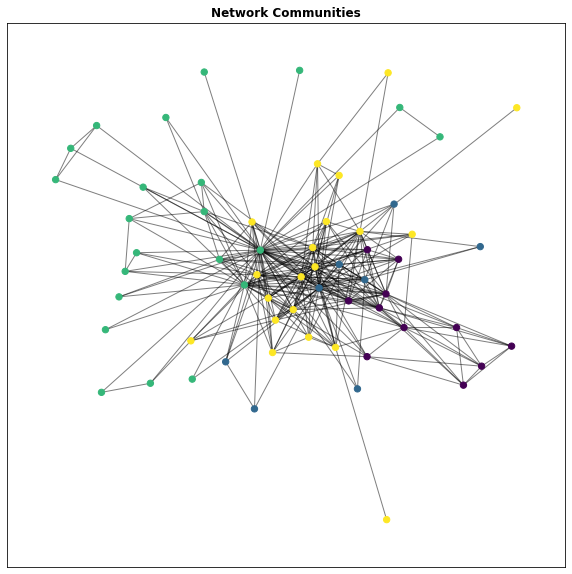

In [ ]:
f = plt.figure(figsize=(10, 10))
ax = f.add_subplot(1,1,1)
pos = nx.spring_layout(G) 

cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, 
                       cmap=cmap, node_color=list(partition.values()),ax=ax)

nx.draw_networkx_edges(G, pos, alpha=0.5)
#f.tight_layout()
plt.axis('on')
f.set_facecolor('w')
plt.title('Network Communities',fontweight ="bold")
plt.savefig('Communities.png')
plt.show()

In [ ]:
print('Modularity: ' +str(float_round(community.modularity(partition, G, weight='weight'),2)))

Modularity: 0.25


The low Modularity for our Network indicates the inseparability of the network.

# K-core decomposition


In [ ]:
def K_core_function(Network, K):
    
    degree_central = nx.degree_centrality(Network)
    sorted_nodes_tuples = sorted(degree_central.items(), key=lambda x: x[1])

    sorted_nodes = []
    for i in sorted_nodes_tuples:
        sorted_nodes.append(i[0])

    for node in sorted_nodes:
        if Network.degree[node] < K:
            Network.remove_node(node)
    
    return Network

def Nice_Network_plot(Network):
    pos = nx.layout.spring_layout(Network)

    fig, ax = plt.subplots(figsize = (12,10))

    degrees = Network.degree() 
    nodes = Network.nodes()

    n_color = np.asarray([degrees[n] for n in nodes])
    sc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, cmap='plasma', ax=ax, node_size=100)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

    color = fig.colorbar(sc)
    color.ax.set_title('Degree of the node',fontweight ="bold")
    ax.set_title('K-Core Decomposition',fontweight ="bold")
    
    plt.show()

In [ ]:
network_file = 'D:\\edge_list_Harry_Potter.csv'
G=nx.read_edgelist(network_file, delimiter=',')

We here choose K=9, therefore, no node with degree=<9 will remain in the network. 

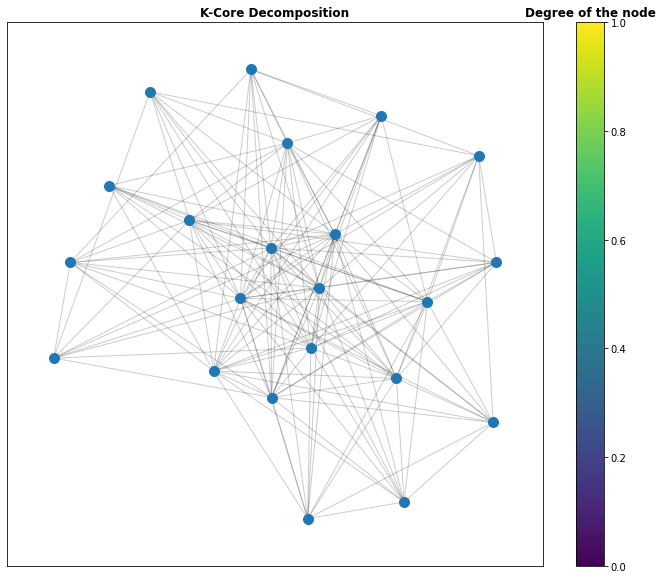

In [ ]:
b = K_core_function(G, K=9)
Nice_Network_plot(b)

# Barabási–Albert Model

In [ ]:
network_file = 'D:\\edge_list_Harry_Potter.csv'
G=nx.read_edgelist(network_file, delimiter=',')
G2=nx.barabasi_albert_graph(len(G.nodes),10)

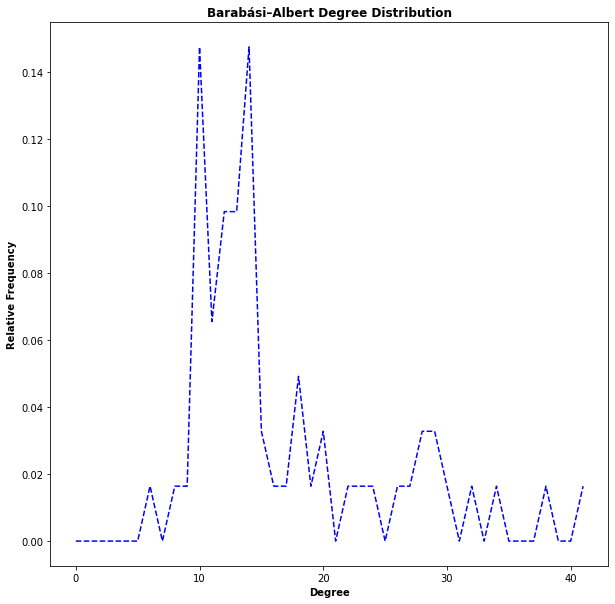

In [ ]:
degree_freq = nx.degree_histogram(G2)
degrees = range(len(degree_freq))
plt.figure(figsize=(10, 10)) 
total=sum(degree_freq[0:])
degree_freq=[i/total for i in degree_freq]
plt.plot(degrees[0:], degree_freq[0:],'b--') 
plt.xlabel('Degree',fontweight ="bold")
plt.ylabel('Relative Frequency',fontweight ="bold")
plt.title('Barabási–Albert Degree Distribution',fontweight ="bold")
plt.savefig('Barabási–Albert_Degree.png')


In [ ]:
j=0
for i in G2:
    j+=int(G2.degree[i])
print('Average Degree: ' +str(float_round(j/len(G2), 2) ))
print('Average Clustering Coefficient: '+ str(float_round(nx.average_clustering(G2),2)))
print('Degree Assortativity Coefficient: '+ str( float_round(nx.degree_assortativity_coefficient(G2),2)))

Average Degree: 16.72
Average Clustering Coefficient: 0.4
Degree Assortativity Coefficient: -0.15


In [ ]:
partition2 = community.best_partition(G2)
print('Modularity for Barabási–Albert Network: ' +str(float_round(community.modularity(partition2, G2, weight='weight'),2)))
print('Network Communities: ' + str(len(set(partition2.values()))))

Modularity for Barabási–Albert Network: 0.14
Network Communities: 5


Like our Network, this BA netword is inseparabile.

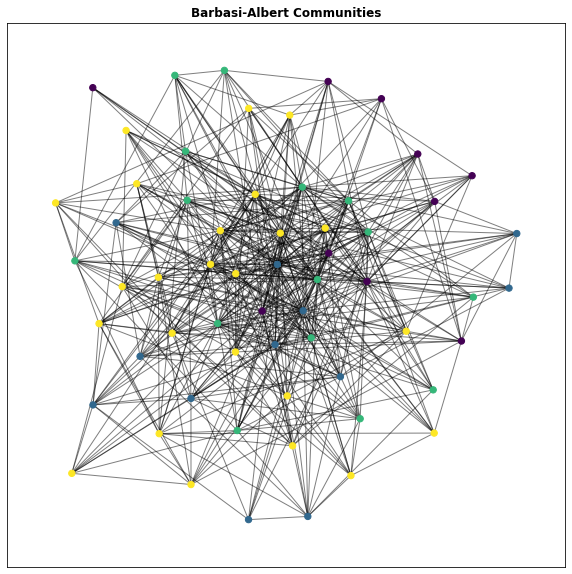

In [ ]:
f = plt.figure(figsize=(10, 10))
ax = f.add_subplot(1,1,1)
pos = nx.spring_layout(G2) 

cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G2, pos, partition2.keys(), node_size=40, 
                       cmap=cmap, node_color=list(partition2.values()),ax=ax)
nx.draw_networkx_edges(G2, pos, alpha=0.5)
plt.axis('on')
f.set_facecolor('w')
plt.title('Barbasi-Albert Communities',fontweight ="bold")
plt.savefig('Barbasi-Albert_Communities.png')
plt.show()

In [ ]:
len(list(partition2.values()))

61

In [ ]:
MIS=mt.mutual_info_score(list(partition.values()), list(partition2.values()), contingency=None)

In [ ]:
print('The mutual information score is '+ str(float_round(MIS, 2))+'.')
print('The Mutual Information is a measure of the similarity between two labels of the same data.')
print('This low MI indicates a significant difference between the community structures of Barabási–Albert Network and our Network.')

The mutual information score is 0.08.
The Mutual Information is a measure of the similarity between two labels of the same data.
This low MI indicates a significant difference between the community structures of Barabási–Albert Network and our Network.


## Extraction k-most influential nodes: Greedy Algorithm

### Greedy algorithm for Influence Maximization Problem

In [ ]:
def get_matrix_from_csv(path): # ++
    df=pd.read_csv(path)
    characters=df.columns.values.tolist()
    df=df.iloc[:,1:]
    adj_matrix=df.to_numpy()
    return adj_matrix,characters

def vertices(G): # ++
    #number of lines = number of nodes
    return [i for i in range(119)]

In [ ]:
def generate_X(G): # ++
    print("generate large number of realisations X of the ICM on G")
    nb_edges=len(G.flatten())
    k_realisations=100 #Hyper parameter: number of simulations of the ICM
    X=[]
    Px=np.random.dirichlet(np.ones(k_realisations),size=1)  #random distriction of P(X)
    for i in range(k_realisations):
        rand=np.random.dirichlet(np.ones(nb_edges),size=1) #create a proba distribution over edges
        X.append(rand[0]) #add the realisation to the list of ICM simulations
    print(X[0])
    return Px[0],X

In [ ]:
def best_node(G,A,V,X_list,Px):
    print("find v in V sans A that maximizes sum( P(Xi) * sigma(A U {v})")
    V_list=list(set(V)-set(A)) #element remaining
    results=0
    max=0
    for v in V_list: #for remaining vertices in V - A
        sum = 0
        for i,x in enumerate(X_list): # sum over all realisations X
            p=Px[i] #retrive probability P(Xi)
            sum=sum + ( p* influence_x(G,A,x,v)) #compute value
        if sum>results:
            results=sum
            max=v

    return max #return the best


In [ ]:
def influence_x(G,A,x,v=None): # the influence of A unfer realization X
    temp_A=A.copy()
    if(v != None):
        temp_A.append(v)
    G=ICM(G,x) #activate and desactivate edges according to flip coin event
    nb_active=0
    for node in temp_A:
        nb_active=nb_active+ (G.sum(axis=0))[node]  #number of vertices reached by "node" through an active edge
    return nb_active

In [ ]:
def ICM(G,x): #percolation of the graph based on X realisation
    icm=G.copy()
    cpt=0
    for i in range(119):
        for j in range(119):
            cpt=cpt+1
            if(np.random.random() >x[cpt-1]): 
                icm[i,j]=1
            else:
                icm[i,j]=0
    
    return icm

In [ ]:
def greedy_hill_climbing(G): #apply greedy algorithm on a graph G with set size k
    k=6 #5% of nodes
    Px,X_list = generate_X(G)

    V=vertices(G) #V holds the vertices of the graph
    A=[]
    for i in range(k):
        v= best_node(G,A,V,X_list,Px)
        A.append(v)
        print(f"A gets node {v}")

    return A


In [ ]:
#apply greedy hill climbing on inferred network
G_,characters= get_matrix_from_csv('/content/adjacency_matrix.csv')
A=greedy_hill_climbing(G_)


generate large number of realisations X of the ICM on G
[2.98518372e-05 1.78936457e-05 2.78676340e-05 ... 4.51488785e-05
 3.05060578e-05 1.07773766e-04]
find v in V sans A that maximizes sum( P(Xi) * sigma(A U {v})
A gets node 1
find v in V sans A that maximizes sum( P(Xi) * sigma(A U {v})
A gets node 2
find v in V sans A that maximizes sum( P(Xi) * sigma(A U {v})
A gets node 7
find v in V sans A that maximizes sum( P(Xi) * sigma(A U {v})
A gets node 11
find v in V sans A that maximizes sum( P(Xi) * sigma(A U {v})
A gets node 24
find v in V sans A that maximizes sum( P(Xi) * sigma(A U {v})
A gets node 13


In [ ]:
print("Initial set of high influence:")
for i in A:
  print(characters[i+1])

Initial set of high influence:
Petunia Dursley 
Dudley Dursley 
 ted 
Tom Marvolo Riddle 
Gordon  
Rubeus Hagrid 


In [ ]:
Px, X_list = generate_X(G_)
icm=ICM(G_,X_list[6])

generate large number of realisations X of the ICM on G
[4.36894860e-05 1.44077002e-04 7.34253679e-05 ... 2.12523344e-04
 2.38396788e-04 8.57725913e-05]


In [ ]:
print(type(icm))

<class 'numpy.ndarray'>


In [ ]:
from networkx.classes.function import set_node_attributes, get_node_attributes

## Large-Degree node Strategy

In [ ]:
candidate=highdegree[:len(result[0])] # Picking candidate nodes

In [ ]:
candidate

['Harry Potter', 'Ron Weasley', 'Rubeus Hagrid']

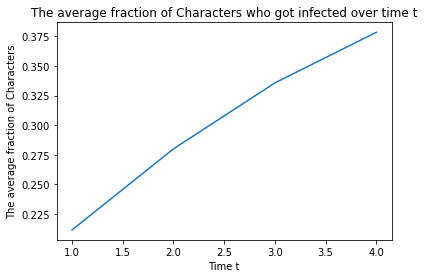

In [ ]:
network_file = 'D:\\edge_list_Harry_Potter.csv'
G=nx.read_edgelist(network_file, delimiter=',')
kres=ICM(G,candidate,p=0.1,m=100,Plot=True)

In [ ]:
print('IMC score for high degree Actors: '+ str(kres))

IMC score for high degree Actors: 19.72


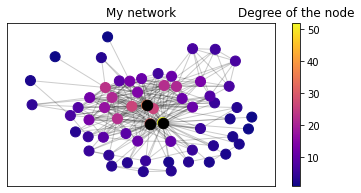

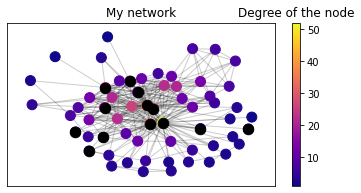

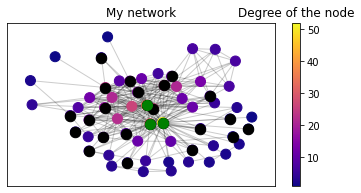

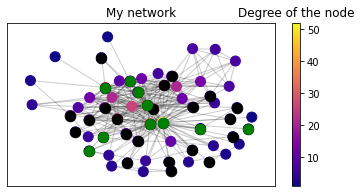

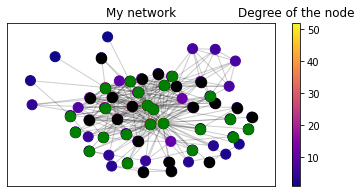

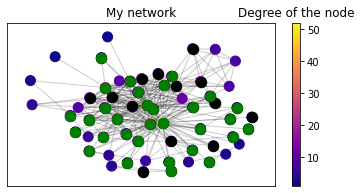

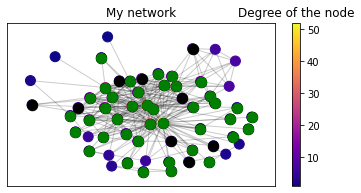

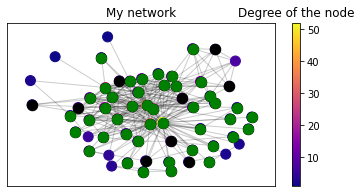

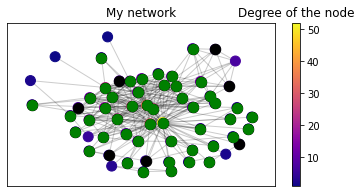

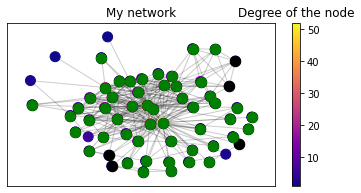

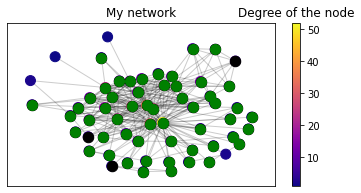

In [ ]:
network_file = 'D:\\edge_list_Harry_Potter.csv'
G=nx.read_edgelist(network_file, delimiter=',')
Out1 = cascade_model(G, starting_nodes =candidate , time = t, p_infect = pinfect, recovery_time = recover_time, plots = True)

## Random Strategy

In [ ]:
aList = G.nodes
print ("Choosing k random actors")
sampled_list = random.sample(aList, len(result[0]))
print(sampled_list)

Choosing k random actors
['Professor Binns', 'Lily Potter', 'Sirius Black']


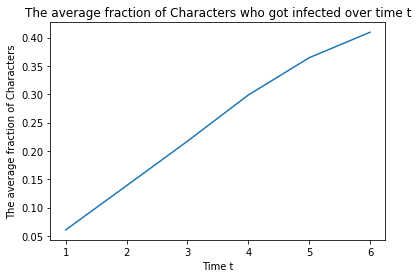

In [ ]:
network_file = 'D:\\edge_list_Harry_Potter.csv'
G=nx.read_edgelist(network_file, delimiter=',')
kres=ICM(G,sampled_list,p=0.1,m=100,Plot=True)

In [ ]:
print('IMC score for random Actors: '+ str(kres))

IMC score for random Actors: 12.37


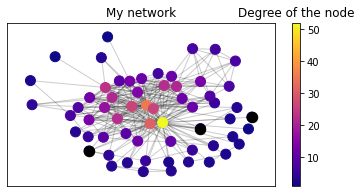

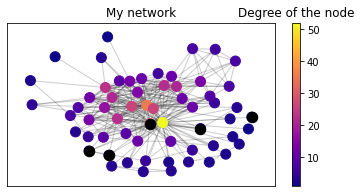

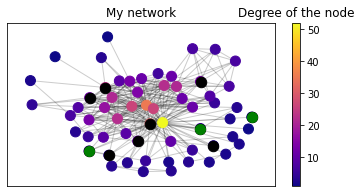

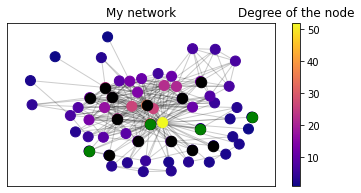

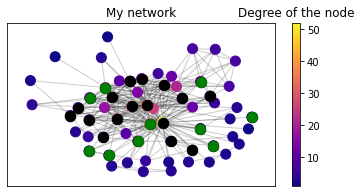

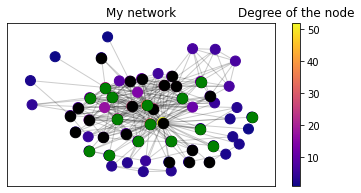

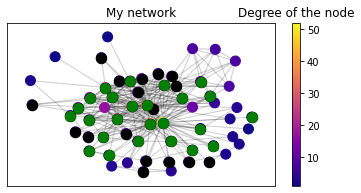

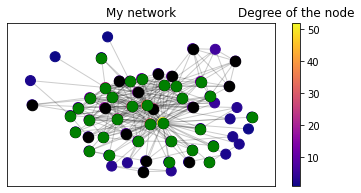

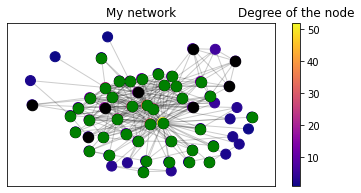

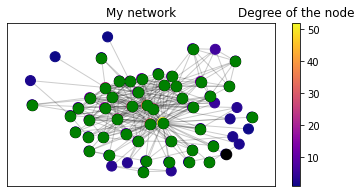

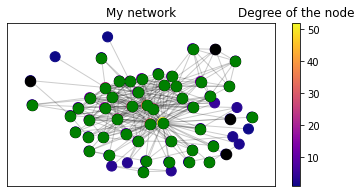

In [ ]:
network_file = 'D:\\edge_list_Harry_Potter.csv'
G=nx.read_edgelist(network_file, delimiter=',')
Out1 = cascade_model(G, starting_nodes =sampled_list , time = t, p_infect = pinfect, recovery_time = recover_time, plots = True)